Implementation of Transfer Lerning for LeNet, AlexNet.

In [ ]:
# !pip install tensorflow_hub

In [ ]:
import tensorflow_hub as hub
import numpy as np
import tensorflow as tf
from tensorflow import keras
from google.colab.patches import cv2_imshow
import pathlib
import matplotlib.pyplot as plt
import cv2

In [ ]:


from sklearn.model_selection import train_test_split




In [ ]:
'''
https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4

https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4

'''

'\nhttps://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4\n\nhttps://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4\n\n'

In [ ]:
classifier = keras.Sequential([ hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape = (224, 224, 3), trainable = False)])

In [ ]:
img = cv2.imread("/content/drive/MyDrive/goldfish.webp")


In [ ]:
re_img = cv2.resize(img, (224, 224))

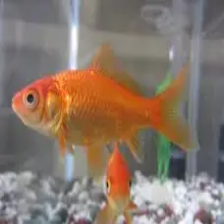

In [ ]:
cv2_imshow(re_img)

In [ ]:
img_scaled = re_img/255

In [ ]:
img_scaled.shape

(224, 224, 3)

In [ ]:
img_scaled[np.newaxis, ...].shape

(1, 224, 224, 3)

In [ ]:
label = classifier.predict(img_scaled[np.newaxis, ...])

1/1 [==============================] - 1s 820ms/step


In [ ]:
label

array([[ 0.35104838,  5.9563    ,  7.401062  , ..., -1.6906242 ,
         0.6873687 , -0.8027544 ]], dtype=float32)

In [ ]:
np.argmax(label)

2

In [ ]:
pretrained_model = hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", input_shape = (224,224,3), trainable = False )

In [ ]:
X = np.load("/content/drive/MyDrive/X_flower.npy")
y = np.load("/content/drive/MyDrive/y_flower.npy")

In [ ]:
X_resized = np.zeros((X.shape[0], 224, 224, 3))
for i in range(X.shape[0]):
  X_resized[i] = cv2.resize(X[i], (224, 224))

y_resized = y


In [ ]:
X_resized.shape,y_resized.shape

((3670, 224, 224, 3), (3670,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resized, y_resized, test_size=0.2)

In [ ]:
#X_train = X_train/255
#y_train = y_train/255

In [ ]:
X_train = X_train/255
y_train = y_train/255

In [ ]:
my_model = keras.Sequential([
                             pretrained_model,
                             keras.layers.Dense(5, activation = "softmax")

                             ])

In [ ]:
my_model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics="accuracy")

In [ ]:
my_model.fit(X_train[:1500],y_train[:1500], epochs = 10)

Epoch 1/10
47/47 [==============================] - 3s 43ms/step - loss: 0.1640 - accuracy: 0.1767
Epoch 2/10
47/47 [==============================] - 2s 44ms/step - loss: 2.7697e-04 - accuracy: 0.1813
Epoch 3/10
47/47 [==============================] - 2s 42ms/step - loss: 2.5870e-04 - accuracy: 0.1813
Epoch 4/10
47/47 [==============================] - 2s 41ms/step - loss: 2.4534e-04 - accuracy: 0.1813
Epoch 5/10
47/47 [==============================] - 2s 41ms/step - loss: 2.3141e-04 - accuracy: 0.1813
Epoch 6/10
47/47 [==============================] - 2s 41ms/step - loss: 2.1751e-04 - accuracy: 0.1813
Epoch 7/10
47/47 [==============================] - 2s 41ms/step - loss: 2.0388e-04 - accuracy: 0.1813
Epoch 8/10
47/47 [==============================] - 2s 43ms/step - loss: 1.9086e-04 - accuracy: 0.1813
Epoch 9/10
47/47 [==============================] - 2s 45ms/step - loss: 1.7860e-04 - accuracy: 0.1813
Epoch 10/10
47/47 [==============================] - 2s 41ms/step - loss: 1.6

In [ ]:
my_model.evaluate(X_test, y_test)

23/23 [==============================] - 3s 84ms/step - loss: 10.9628 - accuracy: 0.1757


[10.9628324508667, 0.17574931681156158]

In [ ]:
my_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________
